In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df= pd.read_csv('/content/telecom_churn_mock_data.csv')
df.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST1000,Male,0,No,No,30,Yes,Yes,No,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.55,2047.01,Yes
1,CUST1001,Female,0,No,Yes,11,Yes,Yes,Fiber optic,No internet service,...,No,No internet service,No,No internet service,Month-to-month,Yes,Electronic check,48.08,522.42,No
2,CUST1002,Female,1,No,No,17,No,No,Fiber optic,No,...,No,No,Yes,No,Two year,No,Electronic check,36.56,610.07,No
3,CUST1003,Female,0,Yes,No,26,Yes,No,No,No,...,No,No,No,No,One year,Yes,Bank transfer (automatic),79.72,2159.26,No
4,CUST1004,Male,0,Yes,Yes,23,Yes,No,Fiber optic,No internet service,...,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,70.42,1672.56,No
5,CUST1005,Male,0,Yes,No,56,Yes,Yes,No,No,...,No,No,No,No,One year,No,Bank transfer (automatic),66.30,3742.26,No
6,CUST1006,Male,0,Yes,No,52,Yes,No,DSL,No,...,No,No internet service,Yes,Yes,Month-to-month,No,Electronic check,64.46,3490.10,Yes
7,CUST1007,Female,0,Yes,Yes,48,Yes,No,Fiber optic,Yes,...,Yes,No internet service,No internet service,Yes,Two year,Yes,Bank transfer (automatic),40.94,2041.05,No
8,CUST1008,Female,0,No,No,20,No,No,DSL,No,...,Yes,No internet service,No,No internet service,Two year,Yes,Electronic check,34.69,723.47,Yes
9,CUST1009,Female,0,Yes,Yes,2,Yes,No,DSL,No,...,No,No,Yes,Yes,One year,Yes,Mailed check,54.66,106.28,Yes


**EDA**

In [2]:
df.shape

(2000, 21)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2000 non-null   object 
 1   Gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   Tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [212]:
correlation = df.corr(numeric_only=True)
print(correlation)

# in this table we got that tensure and total charges have reltaion AS we can see the tensure going up it effect on the total charges.
# monthly charges and total charges have relation.


                SeniorCitizen    Tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000 -0.001378       -0.035339     -0.021054
Tenure              -0.001378  1.000000        0.000447      0.763255
MonthlyCharges      -0.035339  0.000447        1.000000      0.565613
TotalCharges        -0.021054  0.763255        0.565613      1.000000


In [213]:
df['Churn'].value_counts()

,count
Churn,
No,1354
Yes,646


In [214]:
df['Partner'].value_counts()

,count
Partner,
No,1024
Yes,976


In [215]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,1697
1,303


In [216]:
df['Gender'].value_counts()

,count
Gender,
Female,1013
Male,987


<Axes: xlabel='Gender', ylabel='count'>

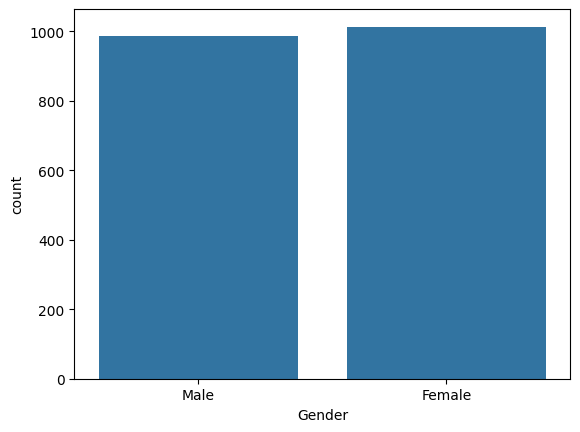

In [217]:
# we got gender coulmn so we have to check how many peoples in that group
sns.countplot(x='Gender',data=df)


In [218]:
# individual coulmns of missing values in percentage.
df.isnull().sum()/df.shape[0]*100

,0
CustomerID,0.0
Gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
Tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [219]:
# Total percentage of missing values of data type
df.isnull().sum().sum()/df.shape[0]*100

np.float64(1.0)

<Axes: >

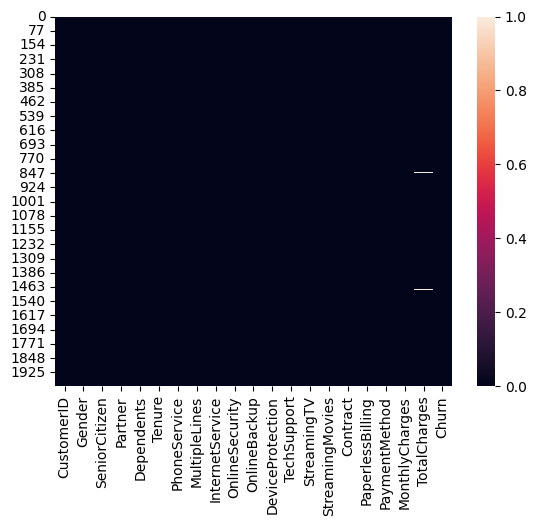

In [220]:
# Graphical represantaion of null values
sns.heatmap(df.isnull())

In [221]:
# removig null values from data set by using dropna
df.dropna(subset=['TotalCharges'], inplace=True)


In [222]:
# checking the null values again
df.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: >

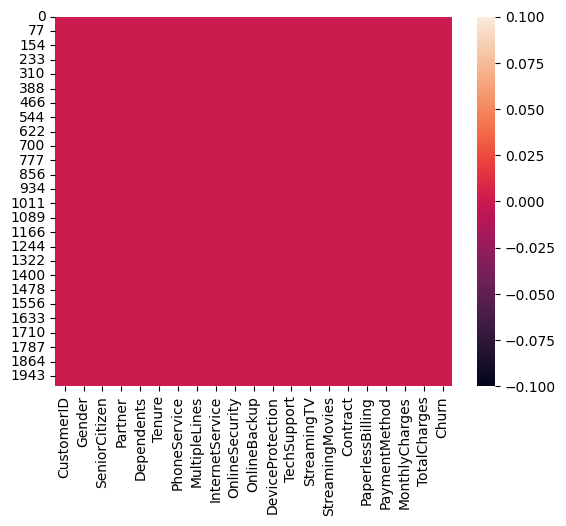

In [223]:
sns.heatmap(df.isnull())

In [224]:
df.select_dtypes(include='number').columns


Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [225]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,1980.000000,1980.000000,1980.000000,1980.000000
mean,0.151515,36.694949,65.846263,2417.307414
std,0.358641,20.839236,27.166266,1802.118466
min,0.000000,1.000000,18.000000,36.020000
25%,0.000000,18.000000,45.225000,954.862500
50%,0.000000,37.000000,65.460000,1993.475000
75%,0.000000,54.000000,84.967500,3561.940000
max,1.000000,72.000000,120.000000,8756.020000


<Axes: >

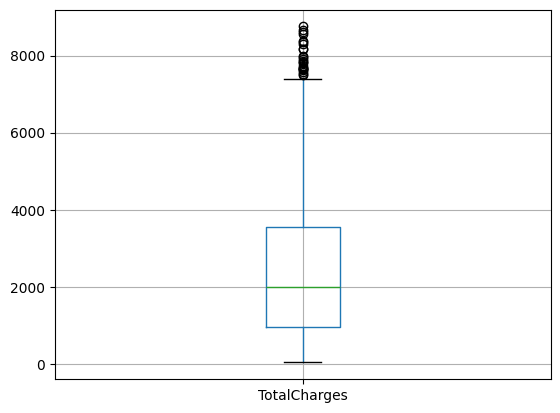

In [226]:
# Detecting outliers
df.boxplot(column=['TotalCharges'])

In [227]:
# checking outliers in total charges
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# See how many values are outliers
outliers = df[(df['TotalCharges'] < lower_limit) | (df['TotalCharges'] > upper_limit)]
print("Outliers found:", outliers.shape[0])


Lower Limit: -2955.7537500000008
Upper Limit: 7472.556250000001
Outliers found: 24


In [228]:
# Ecoding catagorical variables
le = LabelEncoder()
binary_cols = ['Gender', 'Partner', 'Dependents', 'Churn','PaperlessBilling','StreamingTV','DeviceProtection','MultipleLines','PhoneService']


for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [229]:
df = pd.get_dummies(
    df,
    columns=[
        'Contract',
        'PaymentMethod',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'TechSupport',
        'StreamingMovies'
    ],
    drop_first=True
)


In [230]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,DeviceProtection,StreamingTV,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,CUST1000,1,0,0,0,30,1,2,0,0,...,False,True,False,False,False,False,False,False,False,False
1,CUST1001,0,0,0,1,11,1,2,0,0,...,True,False,True,False,True,False,True,False,True,False
2,CUST1002,0,1,0,0,17,0,0,0,2,...,True,False,False,False,False,True,False,False,False,False
3,CUST1003,0,0,1,0,26,1,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,CUST1004,1,0,1,1,23,1,0,0,0,...,True,False,True,False,False,False,False,True,False,True


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             1980 non-null   object 
 1   Gender                                 1980 non-null   int64  
 2   SeniorCitizen                          1980 non-null   int64  
 3   Partner                                1980 non-null   int64  
 4   Dependents                             1980 non-null   int64  
 5   Tenure                                 1980 non-null   int64  
 6   PhoneService                           1980 non-null   int64  
 7   MultipleLines                          1980 non-null   int64  
 8   DeviceProtection                       1980 non-null   int64  
 9   StreamingTV                            1980 non-null   int64  
 10  PaperlessBilling                       1980 non-null   int64  
 11  MonthlyCh

In [232]:
# checking the boolean coulmns
bool_cols = df.select_dtypes(include='bool').columns
print(bool_cols)


Index(['Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')


In [233]:
#convert boolean into numeric
df[bool_cols] = df[bool_cols].astype(int)


In [234]:
df.head(5)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,DeviceProtection,StreamingTV,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,CUST1000,1,0,0,0,30,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
1,CUST1001,0,0,0,1,11,1,2,0,0,...,1,0,1,0,1,0,1,0,1,0
2,CUST1002,0,1,0,0,17,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
3,CUST1003,0,0,1,0,26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,CUST1004,1,0,1,1,23,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1


**Feature Engineering**

In [235]:
# Total spend = monthly charges * Tensure
df['TotalSpend'] = df['MonthlyCharges'] * df['Tenure']


In [236]:
#Tensure in years
df['TenureYears'] = df['Tenure'] / 12

In [237]:
# average monthly charges over tensure
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['Tenure']

**Model Selection And Training**

In [243]:
# dropping customer ID because we do need it in prediction
# which will throwing error in the model because of it unnumeric state.
df = df.drop('CustomerID', axis=1)


In [253]:
# Split the features in to (X) and (y)
# we going to put our features in to (x)
# we gping to puyt the target in to (y)
x=df.drop('Churn',axis=1) # input
y=df['Churn'] # target

In [254]:
# we Spilit the data into Train Test model and we training our model by 80 percent of data
# remaining the data for the test the model
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [246]:
#from operator import mod
# choosing the logistic regression model for the absic and fast result
#model=LogisticRegression(max_iter=1000)

In [255]:
#from sklearn.ensemble import GradientBoostingClassifier

#odel = GradientBoostingClassifier(random_state=42)


In [256]:
#model.fit(x_train, y_train)


GradientBoostingClassifier(random_state=42)

In [257]:
# make a pridiction
#y_pred = model.predict(x_test)


In [258]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6565656565656566
Confusion Matrix:
 [[242  31]
 [105  18]]
Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78       273
           1       0.37      0.15      0.21       123

    accuracy                           0.66       396
   macro avg       0.53      0.52      0.49       396
weighted avg       0.59      0.66      0.60       396



In [251]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=42)
#model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [252]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6540404040404041
Confusion Matrix:
 [[248  25]
 [112  11]]
Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78       273
           1       0.31      0.09      0.14       123

    accuracy                           0.65       396
   macro avg       0.50      0.50      0.46       396
weighted avg       0.57      0.65      0.58       396



In [259]:
!pip install -U imbalanced-learn


In [260]:
from imblearn.over_sampling import SMOTE


In [261]:
smote = SMOTE(random_state=42)

x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)


In [262]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(x_train_bal, y_train_bal)


GradientBoostingClassifier(random_state=42)

In [263]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6136363636363636
Confusion Matrix:
 [[201  72]
 [ 81  42]]
Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       273
           1       0.37      0.34      0.35       123

    accuracy                           0.61       396
   macro avg       0.54      0.54      0.54       396
weighted avg       0.61      0.61      0.61       396

